In [7]:
import pandas as pd
import difflib
import matplotlib as plt

In [16]:
Orexin = pd.read_excel("HCRT.xlsx")
Orexin = Orexin[Orexin["Score"] > 0.4]
Hem = pd.read_excel("HA.xlsx")
Hem = Hem[Hem["Score"] >= 0.4]
HCRT = Orexin["Peptide"]
pHA = Hem["Peptide"]
Hem.info()
HCRT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pos      17 non-null     int64  
 1   Peptide  17 non-null     object 
 2   ID       17 non-null     object 
 3   Target   0 non-null      float64
 4   Core     17 non-null     object 
 5   Score    17 non-null     float64
 6   Rank     17 non-null     float64
 7   Ave      17 non-null     float64
 8   NB       17 non-null     int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 1.3+ KB
<class 'pandas.core.series.Series'>
Int64Index: 14 entries, 0 to 13
Series name: Peptide
Non-Null Count  Dtype 
--------------  ----- 
14 non-null     object
dtypes: object(1)
memory usage: 224.0+ bytes


AttributeError: module 'matplotlib' has no attribute 'show'

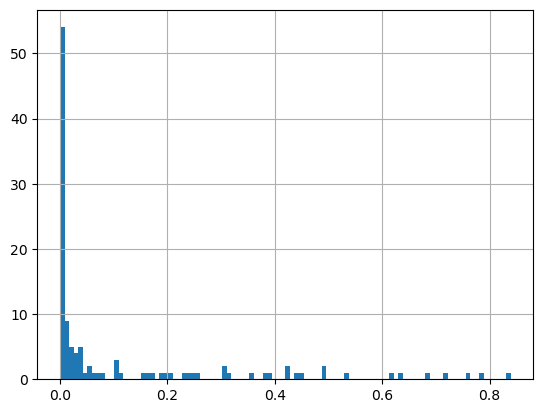

In [14]:
Orexin["Score"].hist(bins=100)
plt.show();

In [17]:
# Import the Jaccard index from textdistance
from textdistance import jaccard

df = pd.DataFrame(columns=['Text', 'score'])
# Define two sample strings
for j in range(0, 14):
    s2 = HCRT[j]
    for i in range(0, 17):
        s1 = pHA[i]
        similarity = jaccard(s1, s2)
        text = f'{s1} from pHA to {s2} from HCRT'
        row = {'Text': text, 'score': similarity}
        df = df.append(row, ignore_index=True)
df.head(2)

/var/folders/7z/yhlc4cg548346yd1n98ph89m0000gp/T/ipykernel_72185/527692561.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/var/folders/7z/yhlc4cg548346yd1n98ph89m0000gp/T/ipykernel_72185/527692561.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/var/folders/7z/yhlc4cg548346yd1n98ph89m0000gp/T/ipykernel_72185/527692561.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/var/folders/7z/yhlc4cg548346yd1n98ph89m0000gp/T/ipykernel_72185/527692561.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

,Text,score
0,MERNAGSGIIISDTP from pHA to ASGNHAAGILTMGRR fr...,0.428571
1,AMERNAGSGIIISDT from pHA to ASGNHAAGILTMGRR fr...,0.500000


In [92]:
df.to_csv('>0.4.csv', index=False)

In [96]:
similarity = pd.read_csv(")..csv")
similarity.head(3)

,Text,score
0,MERNAGSGIIISDTP from pHA to ASGNHAAGILTMGRR fr...,0.428571
1,AMERNAGSGIIISDT from pHA to ASGNHAAGILTMGRR fr...,0.500000
2,ERNAGSGIIISDTPV from pHA to ASGNHAAGILTMGRR fr...,0.363636


In [103]:
similarity = similarity.sort_values(by='score', ascending=False)
similarity.head(30)
similarity.to_csv("Similarity.csv")